In [580]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score 
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import classification_report
from datetime import datetime
import warnings

**Цель**: закрепить знания о математическом смысле метрик TPR, FPR. Изучить построение ROC-кривой, графика Precision-Recall.

**Описание задания**:

Решить задачу классификации при помощи обучения модели логистической регрессии. Качество модели оценивается путем подсчета метрик TPR, FPR и построения графиков ROC-кривой, Precision-Recall. Данные для обучения модели хранятся в файле athletes.csv, который можно найти в материалах к занятию.

**Этапы работы**:

1. Преобразуйте данные:
    
    a. проверьте наличие пропущенных значений. Преобразуйте/удалите пропуски по необходимости;
    
    b. закодируйте категориальные переменные числовыми значениями по необходимости.
    
    
2. Разделите выборку на обучающее (80% данных) и тестовое (20% данных) подмножества.

3. Постройте ROC-кривую с помощью функции sklearn.metrics. roc_curve.

4. Вычислите значение ROC-AUC метрики с помощью функции sklearn.metrics.roc_auc_score.

5. Реализуйте подсчет метрик TPR, FPR «вручную», без использования готовых функций из библиотеки sklearn.

6. Постройте ROC-кривую с помощью вычисленных в п. 5 метрик: объедините графики из п. 3 и п. 6 в один. Сравните, сделайте вывод.

7. Постройте график Precision-Recall, используя метрики, посчитанные в п. 5.

8. *Вычислите значение ROC-AUC метрики, используя метрики, посчитанные в п. 5.

9. **Сформулируйте выводы по проделанной работе**:
    
    a. как по полученным графикам сделать вывод о качестве модели? Как вы оцениваете обученную модель исходя из подсчитанных метрик?

    b. *может ли ROC-кривая проходить ниже диагонали?

**Результат**:

- проведена оценка качества модели классификации;

- реализован подсчет «вручную» основных метрик, проведено сравнение полученных результатов с готовыми функциями из библиотеки sklearn.

**Форма выполнения**:
- ссылка на Jupyter Notebook, загруженный на GitHub;
- ссылка на Google Colab;
- файл с расширением .ipynb.

**Инструменты**:
- Jupyter Notebook/Google Colab
- GitHub
- файл athletes.csv
- Срок выполнения: дедлайн приема решений на проверку

***Рекомендации к выполнению**:
- Убедитесь, что на графике ROC-кривой присутствует диагональная линия, начинающаяся в точке (0;0) и заканчивающаяся в точке (1;1).

- Текст оформляйте в отдельной ячейке Jupyter Notebook/Google Colab в формате markdown.

- У графиков должен быть заголовок, подписи осей, легенда (опционально). Делайте графики бОльшего размера, чем стандартный вывод, чтобы увеличить читаемость.

- Убедитесь, что по ссылкам есть доступ на чтение/просмотр.
- Убедитесь, что все ячейки в работе выполнены и можно увидеть их вывод без повторного запуска.

In [498]:
warnings.filterwarnings('ignore')

# 1. Загрузка данных и первичный анализ EDA 

In [499]:
path = '../Sources/athletes.csv'
df = pd.read_csv(path)

In [500]:
df.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [501]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


In [502]:
df['dob'] = pd.to_datetime(df.dob, format='%m/%d/%y')

In [503]:
cat_cols = [col for col in df.columns if str(df[col].dtypes) in ['object']]
df[cat_cols] = df[cat_cols].astype('category')

In [504]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           11538 non-null  int64         
 1   name         11538 non-null  category      
 2   nationality  11538 non-null  category      
 3   sex          11538 non-null  category      
 4   dob          11537 non-null  datetime64[ns]
 5   height       11208 non-null  float64       
 6   weight       10879 non-null  float64       
 7   sport        11538 non-null  category      
 8   gold         11538 non-null  int64         
 9   silver       11538 non-null  int64         
 10  bronze       11538 non-null  int64         
dtypes: category(4), datetime64[ns](1), float64(2), int64(4)
memory usage: 1.0 MB


In [505]:
df.describe()

,id,height,weight,gold,silver,bronze
count,1.153800e+04,11208.000000,10879.000000,11538.000000,11538.000000,11538.000000
mean,4.999885e+08,1.766282,72.068205,0.057722,0.056769,0.061016
std,2.908648e+08,0.112719,16.177334,0.255910,0.239147,0.243320
min,1.834700e+04,1.210000,31.000000,0.000000,0.000000,0.000000
25%,2.450997e+08,1.690000,60.000000,0.000000,0.000000,0.000000
50%,5.002011e+08,1.760000,70.000000,0.000000,0.000000,0.000000
75%,7.539874e+08,1.840000,81.000000,0.000000,0.000000,0.000000
max,9.999878e+08,2.210000,170.000000,5.000000,2.000000,2.000000


In [506]:
print(f'В данных встречаются дубликаты {df.duplicated().sum()} раз.')

В данных встречаются дубликаты 0 раз.


## 1.1 Работа с пропусками в данных

In [507]:
df.isna().sum()

id               0
name             0
nationality      0
sex              0
dob              1
height         330
weight         659
sport            0
gold             0
silver           0
bronze           0
dtype: int64

In [508]:
print(f'Для date of birth пустых строк { len(df[ df.dob.isna()])}')
print(f'Для height пустых строк { len(df[ df.height.isna()])}')
print(f'Для weight пустых строк { len(df[ df.weight.isna()])}')
print(f'Всего строк в наборе {df.shape[0]}')

Для date of birth пустых строк 1
Для height пустых строк 330
Для weight пустых строк 659
Всего строк в наборе 11538


**Date of birth**

In [509]:
# Видим, что для одной записи у нас отсутствует дата рождения. Эту запись исключим из обучения модели.
df[df['dob'].isna()==1]

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
8546,663676373,Pavel Sozykin,RUS,male,NaT,NaN,NaN,sailing,0,0,0


In [510]:
df = df[df['dob'].isna() != 1]

**Height & Weight**

In [511]:
# Заполним пропущенные значения медианой в разрезе пола и вида спорта.
df.height = df.height.fillna(df.groupby(['sex', 'sport'])['height'].transform('median'))
df.weight = df.weight.fillna(df.groupby(['sex', 'sport'])['weight'].transform('median'))

In [512]:
df[['height', 'weight']].isna().sum()

height      0
weight    286
dtype: int64

In [513]:
print('Видим, что пропуски остались толкьо в категории спорта {}'.format(df[df.weight.isna()]['sport'].unique()[0]))

Видим, что пропуски остались толкьо в категории спорта boxing


In [514]:
# Заменим оставшиеся пропуски медианным значением в разрезе пола и роста спортсменов

In [515]:
df.weight = df.weight.fillna(df.groupby(['sex', 'height'])['weight'].transform('median'))

**Посмотрим на данные после обработки пропусков**

In [516]:
df.isna().sum()

id             0
name           0
nationality    0
sex            0
dob            0
height         0
weight         0
sport          0
gold           0
silver         0
bronze         0
dtype: int64

## 1.2 Работа с DateTime

In [517]:
def calculate_age(birthdate):
    
    """ Функция позволяет по дате рождения рассчитать возраст спортсмена"""
    
    age = datetime.now().year - birthdate.year  - (datetime.now().month < birthdate.month)
    return age

In [518]:
df['age'] = df['dob'].apply(calculate_age)


In [519]:
df.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze,age
0,736041664,A Jesus Garcia,ESP,male,1969-10-17,1.72,64.0,athletics,0,0,0,53
1,532037425,A Lam Shin,KOR,female,1986-09-23,1.68,56.0,fencing,0,0,0,36
2,435962603,Aaron Brown,CAN,male,1992-05-27,1.98,79.0,athletics,0,0,1,30
3,521041435,Aaron Cook,MDA,male,1991-01-02,1.83,80.0,taekwondo,0,0,0,31
4,33922579,Aaron Gate,NZL,male,1990-11-26,1.81,71.0,cycling,0,0,0,32


In [520]:
df[df['age'] < 0 ].head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze,age
32,189886442,Abdelkebir Ouaddar,MAR,male,2062-07-15,1.74,67.0,equestrian,0,0,0,-40
55,969824503,Abdullah Alrashidi,IOA,male,2063-08-21,1.83,84.0,shooting,0,0,1,-41
1376,128263534,Beatriz Ferrer-Salat,ESP,female,2066-03-11,1.76,58.0,equestrian,0,0,0,-44
1446,951599589,Bernadette Pujals,MEX,female,2068-06-08,1.58,55.0,equestrian,0,0,0,-46
1746,48374531,Carl Hester,GBR,male,2067-06-29,1.82,86.0,equestrian,0,1,0,-45


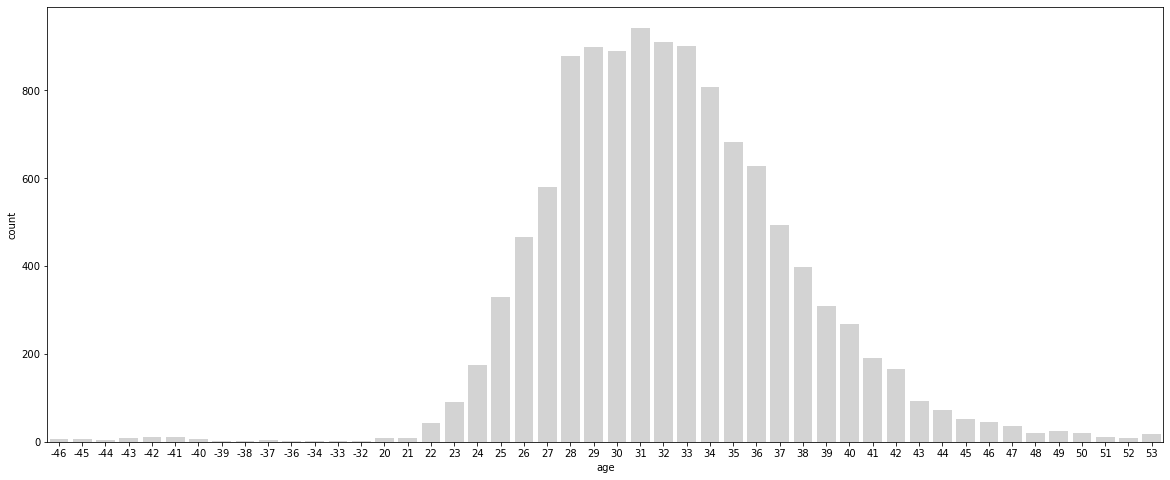

In [521]:
plt.figure(figsize=(20, 8))
sns.countplot(data=df, x='age', color='lightgrey')
plt.show()

**Вывод**: видим, что в данных есть ошибки, некоторые даты рождения спортсменов указаны в будущем. Исключим такие записи из датасета.

In [522]:
# Оставляем участников от 18 лет
df = df[df.age >= 18]

# 2. Подготовка данных для построения модели

In [523]:
# Список всех полей датасета
[col for col in df.columns]

['id',
 'name',
 'nationality',
 'sex',
 'dob',
 'height',
 'weight',
 'sport',
 'gold',
 'silver',
 'bronze',
 'age']

In [525]:
# Выделим признаки и ответы
X, y = df[['nationality', 'height', 'weight', 'sport', 'gold', 'silver', 'bronze']], df['sex']

**Замечание**: id и имя участников исключил из модели, т.к. это технические признаки и не влияют на предективную способность модели.

### 2.1 One hot and label Encoding 

In [528]:
# Кодировку признаков можно произвести до разбиения данных на трейн и тест, а скейлинг необходимо проводить после.
le = LabelEncoder()
y = le.fit_transform(y)

In [529]:
X = pd.get_dummies(X)

In [530]:
X.head()

,height,weight,gold,silver,bronze,nationality_AFG,nationality_ALB,nationality_ALG,nationality_AND,nationality_ANG,...,sport_rugby sevens,sport_sailing,sport_shooting,sport_table tennis,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling
0,1.72,64.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.68,56.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.98,79.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.83,80.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1.81,71.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 2.2 Разделение выборки на обучающую (80% данных) и тестовую (20% данных) подмножества.

In [692]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 2.3 Стандартизация данных

In [693]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### 2.4 Построение модели

In [694]:
# Строим модель
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
lr.score(X_test, y_test)

0.8466230936819172

# 3 Оценка качества


### 3.1 classification_report & confusion_matrix

Прежде, чем строить основные метрики смотрю на classification_report и матрицу ошибок:

In [695]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.82      0.83      1033
           1       0.86      0.87      0.86      1262

    accuracy                           0.85      2295
   macro avg       0.85      0.84      0.84      2295
weighted avg       0.85      0.85      0.85      2295



Confusion Matrix:


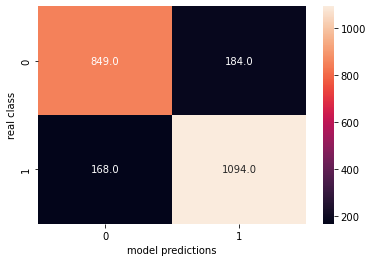

In [696]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt=".1f")
plt.xlabel('model predictions')
plt.ylabel('real class')
print('Confusion Matrix:')
plt.show()

### 3.2 Построение ROC-кривой с помощью функции sklearn.metrics. roc_curve.

In [871]:
fpr, tpr, tresholds = roc_curve(y_test, probs)

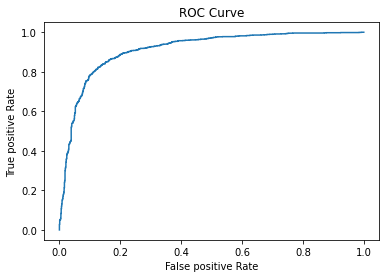

In [872]:
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')

plt.show()

### 3.3 Вычисление значения ROC-AUC метрики с помощью функции sklearn.metrics.roc_auc_score.

In [699]:
# Area Under Curve
roc_auc_score(y_test, probs)

0.9119684331482626

### 3.3 подсчет метрик TPR, FPR «вручную», без использования готовых функций из библиотеки sklearn.

In [700]:
y_pred_proba = lr.predict_proba(X_test)[:, 1]

In [705]:
treshold = 0.5

In [713]:
pd.DataFrame({'real': y_test, 'y_pred_proba': y_pred_proba, 'treshold': treshold, 'y_pred': y_pred}).head()

,real,y_pred_proba,treshold,y_pred
0,1,0.959041,0.5,1
1,0,0.155196,0.5,0
2,0,0.019630,0.5,0
3,1,0.690934,0.5,1
4,0,0.061172,0.5,0


In [796]:
# Рассчитаем: True Positive, True Negative, False Positive, False Negative

def calc_tpr_fpr(y_test, y_pred_proba, treshold=0.5):

    tp, tn, fp, fn = (0, 0, 0, 0)

    for i in range(len(y_test)):
        prediction = y_pred_proba[i]

        if prediction > treshold:
            pred_calss = 1
        else:
            pred_calss = 0

        if (y_test[i] == 1) and pred_calss == 1:
            tp += 1
        elif y_test[i] == 0 and pred_calss == 0:
            tn += 1    
        elif y_test[i] == 0 and pred_calss == 1:
            fp += 1 
        else:
            fn += 1
    
    print(f'tp = {tp}, tn = {tn}, fp = {fp}, fn = {fn};')    
    print('*'*39)
    
    tpr = tp / (tp + fn)
    fpr = fp / (tn + fp)
    
    print(f'True Positive Rate  (TPR): {round(tpr, 3)}')
    print(f'False Positive Rate (FPR): {round(fpr, 3)}')
    
    return tpr, fpr
    

In [797]:
calc_tpr_fpr(y_test, y_pred_proba)

tp = 1094, tn = 849, fp = 184, fn = 168;
***************************************
True Positive Rate  (TPR): 0.867
False Positive Rate (FPR): 0.178


(0.866877971473851, 0.1781219748305905)

**Примечание:** 

* TPR показывает, какую долю объектов положительного класса из всех объектов положительного класса нашел алгоритм.
* FPR показывает, какую долю из объектов negative класса алгоритм предсказал неверно.

### 3.4 Постройте ROC-кривую с помощью вычисленных в п. 5 метрик: объедините графики из п. 3 и п. 6 в один. Сравните, сделайте вывод.

In [878]:
def custom_roc_curve(y_test, y_pred_proba):
    
    tpr_list = []
    fpr_list = []
    treshold_list =[] 
    roc_stats = []
    tresholds = np.linspace(0, 1, y_test.shape[0]) # Делаю столько же разбиение, сколько и данных.
    
    for treshold in tresholds:

        tp, tn, fp, fn = (0, 0, 0, 0)

        for i in range(len(y_test)):
            prediction = y_pred_proba[i]

            if prediction > treshold:
                pred_calss = 1
            else:
                pred_calss = 0

            if (y_test[i] == 1) and pred_calss == 1:
                tp += 1
            elif y_test[i] == 0 and pred_calss == 0:
                tn += 1    
            elif y_test[i] == 0 and pred_calss == 1:
                fp += 1 
            else:
                fn += 1

        tpr = tp / (tp + fn)
        fpr = fp / (tn + fp)
        
#         print(f'TPR = {round(tpr, 3)}, FPR = {round(fpr, 3)}, treshold = {round(treshold, 2)}')
        
#         roc_stats.append([tpr, fpr, treshold])
        
        tpr_list.append(tpr)
        fpr_list.append(fpr)
        treshold_list.append(round(treshold, 2))
     
    return tpr_list, fpr_list, treshold_list

In [879]:
tpr_custom, fpr_custom, treshold_custom = custom_roc_curve(y_test, y_pred_proba)

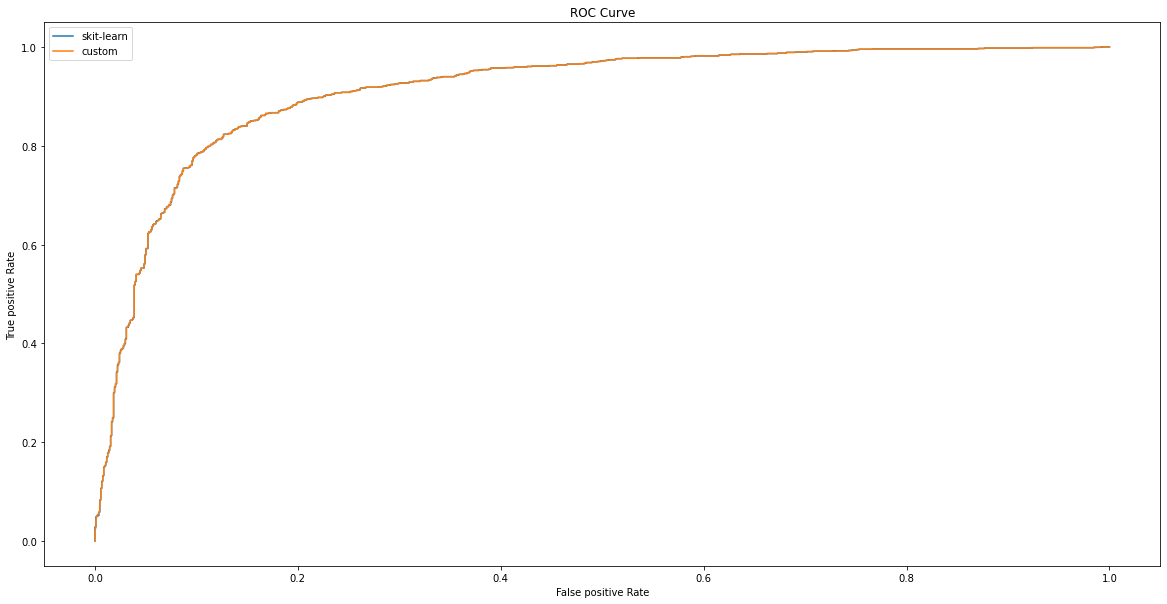

In [885]:
plt.figure(figsize=(20, 10))
plt.plot(fpr, tpr, label = 'skit-learn')
plt.plot(fpr_custom, tpr_custom, label = 'custom')
plt.title('ROC Curve')
plt.legend()
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')

plt.show()

Average Precision Score and Precision Recal Curve

In [568]:
precision, recall, tresholds = precision_recall_curve(y_test, probs)
fpr, tpr, tresholds_ = roc_curve(y_test, probs)

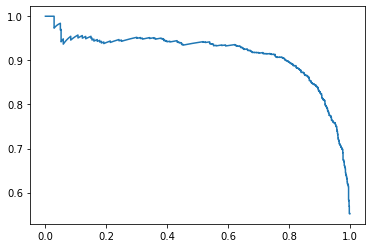

In [569]:
plt.plot(recall, precision)
plt.show()

In [570]:
average_precision_score(y_test, probs )

0.9132794453004123